In [8]:
import pandas as pd
df_haber = pd.read_csv(r'C:\Users\mo20127750\Documents\Py_Data\haberman.csv',names=['age','year_of_operation','positive_ve_auxillary_nodes','survival'],sep=',')
df_haber.head()                                                                          

age  year_of_operation  positive_ve_auxillary_nodes  survival
0   30                 64                            1         1
1   30                 62                            3         1
2   30                 65                            0         1
3   31                 59                            2         1
4   31                 65                            4         1

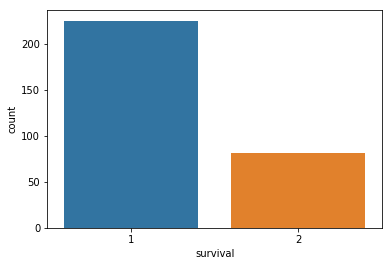

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df_haber.survival)
plt.show()

In [12]:
df_haber.dtypes

age                            int64
year_of_operation              int64
positive_ve_auxillary_nodes    int64
survival                       int64
dtype: object

In [14]:
df_survived = df_haber.groupby('survival').get_group(1)

df_died = df_haber.groupby('survival').get_group(2)

df_survived.head()

age  year_of_operation  positive_ve_auxillary_nodes  survival
0   30                 64                            1         1
1   30                 62                            3         1
2   30                 65                            0         1
3   31                 59                            2         1
4   31                 65                            4         1

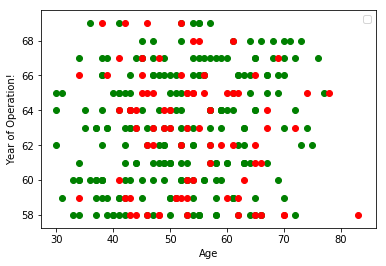

In [15]:
import warnings
warnings.filterwarnings('ignore')
plt.scatter(x = df_haber.age[df_haber.survival==1],y = df_haber.year_of_operation[df_haber.survival==1],c = 'green')
plt.scatter(x = df_haber.age[df_haber.survival ==2],y = df_haber.year_of_operation[df_haber.survival==2],c = 'red')
plt.legend('Survived more than 5 years','Could not survived more than 5 years!')
plt.xlabel('Age');
plt.ylabel('Year of Operation!');
plt.show()

In [16]:
print('No. of people did not survived:',len(df_died))

No. of people did not survived: 81


In [17]:
print('Rows in our Data frame: ',df_haber.shape[0])

Rows in our Data frame:  306


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore

In [23]:
X = df_haber.drop(['survival'],axis=1)
y = df_haber.survival
                  
#split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test  =scaling.transform(X_test)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

clr=KNeighborsClassifier(n_neighbors=5,metric='euclidean',p=1)
clr.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=1,
           weights='uniform')

In [35]:
y_pred = clr.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.6129032258064516

In [41]:
from sklearn.metrics import classification
print(confusion_matrix(y_test,y_pred))

[[34  3]
 [21  4]]


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.62      0.92      0.74        37
           2       0.57      0.16      0.25        25

   micro avg       0.61      0.61      0.61        62
   macro avg       0.59      0.54      0.49        62
weighted avg       0.60      0.61      0.54        62



In [44]:
scale = df_haber.apply(zscore)
scale.head()

age  year_of_operation  positive_ve_auxillary_nodes  survival
0 -2.082140           0.353584                    -0.421592      -0.6
1 -2.082140          -0.262921                    -0.142959      -0.6
2 -2.082140           0.661837                    -0.560909      -0.6
3 -1.989426          -1.187680                    -0.282275      -0.6
4 -1.989426           0.661837                    -0.003642      -0.6

In [45]:
X = df_haber.drop(['survival'],axis=1)
y = df_haber.survival

#split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [46]:
clr = KNeighborsClassifier(n_neighbors=2,metric='euclidean',p=1)
clr.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=2, p=1,
           weights='uniform')

In [47]:
y_pred = clr.predict(X_test)

In [48]:
accuracy_score(y_test,y_pred)

0.6129032258064516

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.61      0.95      0.74        37
           2       0.60      0.12      0.20        25

   micro avg       0.61      0.61      0.61        62
   macro avg       0.61      0.53      0.47        62
weighted avg       0.61      0.61      0.53        62

